<a href="https://colab.research.google.com/github/IManasa19/Predicting-Energy-consumption/blob/main/ENERGY_PREDICTION_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Loding Dataset

In [ ]:
# Load the dataset for respective file loaction
EC_data = pd.read_csv("/content/Manasa_daily_dataset.csv")

In [ ]:
# Show the first few rows of the dataset
print(EC_data.head())

       LCLid         day  energy_median  energy_mean  energy_max  \
0  MAC000131  2011-12-15         0.4850     0.432045       0.868   
1  MAC000131  2011-12-16         0.1415     0.296167       1.116   
2  MAC000131  2011-12-17         0.1015     0.189812       0.685   
3  MAC000131  2011-12-18         0.1140     0.218979       0.676   
4  MAC000131  2011-12-19         0.1910     0.325979       0.788   

   energy_count  energy_std  energy_sum  energy_min  
0          22.0    0.239146       9.505       0.072  
1          48.0    0.281471      14.216       0.031  
2          48.0    0.188405       9.111       0.064  
3          48.0    0.202919      10.511       0.065  
4          48.0    0.259205      15.647       0.066  


In [ ]:
#Check for missing values in the datset
print(EC_data.isnull())

        LCLid    day  energy_median  energy_mean  energy_max  energy_count  \
0       False  False          False        False       False         False   
1       False  False          False        False       False         False   
2       False  False          False        False       False         False   
3       False  False          False        False       False         False   
4       False  False          False        False       False         False   
...       ...    ...            ...          ...         ...           ...   
501737  False  False          False        False       False         False   
501738  False  False          False        False       False         False   
501739  False  False          False        False       False         False   
501740  False  False          False        False       False         False   
501741  False  False           True         True        True          True   

        energy_std  energy_sum  energy_min  
0            False

In [ ]:
# Sum of missing values fo each feature
print(EC_data.isnull().sum())

LCLid               0
day                 0
energy_median       7
energy_mean         7
energy_max          7
energy_count        1
energy_std       1525
energy_sum          7
energy_min          7
dtype: int64


In [ ]:
# Deatailed Summary  of the dataset
print(EC_data.describe())

       energy_median    energy_mean     energy_max   energy_count  \
count  501735.000000  501735.000000  501735.000000  501741.000000   
mean        0.151373       0.201117       0.799428      47.813685   
std         0.149469       0.170500       0.645780       2.732127   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.068000       0.097854       0.337000      48.000000   
50%         0.114500       0.159312       0.654000      48.000000   
75%         0.185500       0.251021       1.067000      48.000000   
max         6.905500       6.928250       9.257000      48.000000   

          energy_std     energy_sum     energy_min  
count  500217.000000  501735.000000  501735.000000  
mean        0.164642       9.618524       0.055142  
std         0.148521       8.144379       0.075993  
min         0.000000       0.000000       0.000000  
25%         0.067521       4.675000       0.020000  
50%         0.125309       7.627000       0.039000  
75%    

In [ ]:
EC_data

,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
0,MAC000131,2011-12-15,0.4850,0.432045,0.868,22.0,0.239146,9.505,0.072
1,MAC000131,2011-12-16,0.1415,0.296167,1.116,48.0,0.281471,14.216,0.031
2,MAC000131,2011-12-17,0.1015,0.189812,0.685,48.0,0.188405,9.111,0.064
3,MAC000131,2011-12-18,0.1140,0.218979,0.676,48.0,0.202919,10.511,0.065
4,MAC000131,2011-12-19,0.1910,0.325979,0.788,48.0,0.259205,15.647,0.066
...,...,...,...,...,...,...,...,...,...
501737,MAC004170,2013-03-07,0.2125,0.286812,1.072,48.0,0.194664,13.767,0.138
501738,MAC004170,2013-03-08,0.3065,0.453563,2.397,48.0,0.427884,21.771,0.169
501739,MAC004170,2013-03-09,0.3805,0.352625,0.641,48.0,0.147605,16.926,0.127
501740,MAC004170,2013-03-10,0.3025,0.380563,1.443,48.0,0.268019,18.267,0.163


# Data Pre-Processing

In [ ]:
# Specify the columns where missing values should be filled with the mean/median/ffill/dropna
# # Fill missing values with the mean for the specified columns
# EC_data[columns_to_fill] = EC_data[columns_to_fill].fillna(EC_data[columns_to_fill].mean())
# EC_data[columns_to_fill] = EC_data[columns_to_fill].fillna(EC_data[columns_to_fill].median())
# EC_data[columns_to_fill] = EC_data[columns_to_fill].fillna(method='ffill')
# Drop rows with missing values in the specified columns
# EC_data[columns_to_fill] = EC_data[columns_to_fill].dropna(subset=columns_to_fill)
# EC_data = EC_data.dropna(subset=columns_to_fill)


columns_to_fill = ['energy_median', 'energy_mean', 'energy_max', 'energy_count', 'energy_std', 'energy_min']
# Fill missing values using linear interpolation
EC_data[columns_to_fill] = EC_data[columns_to_fill].interpolate(method='linear')


In [ ]:
EC_data[columns_to_fill]

,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_min
0,0.4850,0.432045,0.868,22.0,0.239146,0.072
1,0.1415,0.296167,1.116,48.0,0.281471,0.031
2,0.1015,0.189812,0.685,48.0,0.188405,0.064
3,0.1140,0.218979,0.676,48.0,0.202919,0.065
4,0.1910,0.325979,0.788,48.0,0.259205,0.066
...,...,...,...,...,...,...
501737,0.2125,0.286812,1.072,48.0,0.194664,0.138
501738,0.3065,0.453563,2.397,48.0,0.427884,0.169
501739,0.3805,0.352625,0.641,48.0,0.147605,0.127
501740,0.3025,0.380563,1.443,48.0,0.268019,0.163


In [ ]:
# Check there are no missing values in the specified columns
print(EC_data[columns_to_fill].isnull().sum())

energy_median    0
energy_mean      0
energy_max       0
energy_count     0
energy_std       0
energy_min       0
dtype: int64


# Feature variables Selection and Target Variable selection

In [ ]:
# Feature variables Selection and Target Variable selection

In [ ]:
# Define features (X) and target (y)
X_input = EC_data[['energy_median', 'energy_mean', 'energy_max', 'energy_count', 'energy_std', 'energy_min']]
y_target = EC_data['energy_sum']

In [ ]:
X_input

,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_min
0,0.4850,0.432045,0.868,22.0,0.239146,0.072
1,0.1415,0.296167,1.116,48.0,0.281471,0.031
2,0.1015,0.189812,0.685,48.0,0.188405,0.064
3,0.1140,0.218979,0.676,48.0,0.202919,0.065
4,0.1910,0.325979,0.788,48.0,0.259205,0.066
...,...,...,...,...,...,...
501737,0.2125,0.286812,1.072,48.0,0.194664,0.138
501738,0.3065,0.453563,2.397,48.0,0.427884,0.169
501739,0.3805,0.352625,0.641,48.0,0.147605,0.127
501740,0.3025,0.380563,1.443,48.0,0.268019,0.163


In [ ]:
y_target

,energy_sum
0,9.505
1,14.216
2,9.111
3,10.511
4,15.647
...,...
501737,13.767
501738,21.771
501739,16.926
501740,18.267


In [ ]:
print(y_target.isnull().sum())

7


In [ ]:
# y_target = y_target.fillna(y_target.median())
# Forward fill
# y_target = y_target.fillna(method='ffill')

# Fill missing values of Target feature using linear interpolation
y_target = y_target.interpolate(method='linear')

In [ ]:
print(y_target.isnull().sum())

0


# Dividing Data into Train and Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_input, y_target, test_size=0.2, random_state=42)


In [ ]:

# Display shapes of training and testing data
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (401393, 6)
X_test shape: (100349, 6)
y_train shape: (401393,)
y_test shape: (100349,)


## Model Selection Linear Regression

In [ ]:
# Initialize and train the Linear Regression model
EC_lr_model = LinearRegression()
EC_lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = EC_lr_model.predict(X_test)

# Evaluate the Linear Regression model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Root Mean Squared Error
rmse_lr = np.sqrt(mse_lr)

print(f"Linear Regression - MSE: {mse_lr:.2f}, R2: {r2_lr:.2f}, RMSE: {rmse_lr:.2f}")


Linear Regression - MSE: 1.63, R2: 0.98, RMSE: 1.28


In [ ]:
new_input = pd.DataFrame({
    'energy_median': [0.4850],  # replace with actual value
    'energy_mean': [0.432045],    # replace with actual value
    'energy_max': [0.868],    # replace with actual value
    'energy_count': [22],   # replace with actual value
    'energy_std': [0.239146],     # replace with actual value
    #'energy_sum': [1500],   # replace with actual value
    'energy_min': [0.072]      # replace with actual value
})

# Display the new input
print(new_input)

   energy_median  energy_mean  energy_max  energy_count  energy_std  \
0          0.485     0.432045       0.868            22    0.239146   

   energy_min  
0       0.072  


In [ ]:
# Predict energy consumption using Random Forest
lr_prediction = EC_lr_model.predict(new_input)
print(f'Predicted Energy Consumption (Decision Tree): {lr_prediction[0]}')

Predicted Energy Consumption (Decision Tree): 16.559008597760823


##  Model Selection Elastic Net Regression

In [ ]:
from sklearn.linear_model import ElasticNet
EC_EN_model = ElasticNet(alpha=0.1, l1_ratio=0.7)

EC_EN_model.fit(X_train, y_train)

# Predict on the test set
y_pred_en = EC_EN_model.predict(X_test)

# Evaluate the Linear Regression model
mse_en = mean_squared_error(y_test, y_pred_en)
r2_en = r2_score(y_test, y_pred_en)

# Root Mean Squared Error
rmse_en = np.sqrt(mse_en)

print(f"Linear Regression - MSE: {mse_en:.2f}, R2: {r2_en:.2f}, RMSE: {rmse_en:.2f}")

Linear Regression - MSE: 9.62, R2: 0.86, RMSE: 3.10


In [ ]:
# Predict energy consumption using Random Forest
EC_EN_prediction = EC_EN_model.predict(new_input)
print(f'Predicted Energy Consumption (ElasticNet Regression): {EC_EN_prediction[0]}')

Predicted Energy Consumption (ElasticNet Regression): 12.358126705519462


##  Model Selection RandomForest Regression

In [ ]:
# Initialize and train the Random Forest model
ec_rf_model = RandomForestRegressor(n_estimators=50, random_state=42)
ec_rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = ec_rf_model.predict(X_test)

# Evaluate the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Root Mean Squared Error
rmse_rf = np.sqrt(mse_rf)

print(f"Random Forest - MSE: {mse_rf:.2f}, R2: {r2_rf:.2f}, RMSE: {rmse_rf:.2f}")


Random Forest - MSE: 0.74, R2: 0.99, RMSE: 0.86


In [ ]:
# Predict energy consumption using Random Forest
EC_rf_prediction = ec_rf_model.predict(new_input)
print(f'Predicted Energy Consumption (RandomForest Regression): {EC_rf_prediction[0]}')

Predicted Energy Consumption (RandomForest Regression): 9.559380001999996


In [ ]:
import plotly.graph_objects as go

# comparison table for the mestrci used in the different models.
EC_data = {
    'Model': ['Linear Regression', 'Elastic Net Regression', 'Random Forest'],
    'MSE': [mse_lr, mse_en, mse_rf],
    'R²': [r2_lr, r2_en, r2_rf],
    'RMSE': [rmse_lr, rmse_en, rmse_rf]
}

# Create a Plotly Table
fig = go.Figure(data=[go.Table(
    header=dict(
        values=["<b>Model</b>", "<b>MSE</b>", "<b>R²</b>", "<b>RMSE</b>"],
        fill_color="#264653",
        font=dict(color="white", size=14),
        align="center",
    ),
    cells=dict(
        values=[EC_data['Model'], EC_data['MSE'], EC_data['R²'], EC_data['RMSE']],
        fill_color=[["#e9f5db"] * len(EC_data['Model']),
                    ["#f6c28b"] * len(EC_data['MSE']),
                    ["#d5a6bd"] * len(EC_data['R²']),
                    ["#e9f5db"] * len(EC_data['RMSE'])],
        font=dict(color="black", size=12),
        align="center",
    )
)])

# Customize layout
fig.update_layout(
    title="Model Performance Comparison",
    title_font=dict(size=18, family='Arial', color='#DE3163'),
    margin=dict(l=15, r=15, t=50, b=30),
)

# Show the table
fig.show()


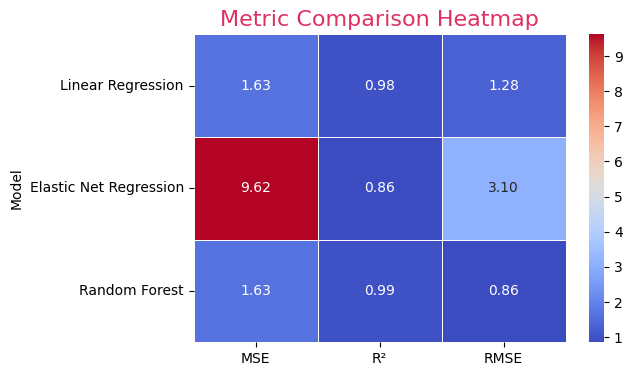

In [ ]:
import seaborn as sns
import pandas as pd

# Create DataFrame for the heatmap
EC_metrics_data = pd.DataFrame({
    'Model': ['Linear Regression', 'Elastic Net Regression', 'Random Forest'],
    'MSE': [mse_lr, mse_en, mse_lr],
    'R²': [r2_lr, r2_en, r2_rf],
    'RMSE': [rmse_lr, rmse_en, rmse_rf]
}).set_index('Model')

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(EC_metrics_data, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Metric Comparison Heatmap', fontsize=16, color='#DE3163')
plt.show()


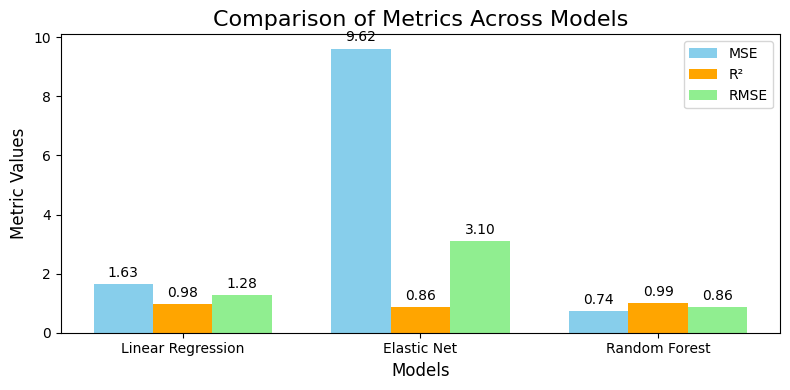

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for models and metrics
EC_models = ['Linear Regression', 'Elastic Net', 'Random Forest']
mse = [mse_lr, mse_en, mse_rf]
r2 = [r2_lr, r2_en, r2_rf]
rmse = [rmse_lr, rmse_en, rmse_rf]

# X-axis positions
x = np.arange(len(EC_models))

# Bar width
width = 0.25

# Create grouped bar chart
fig, ax = plt.subplots(figsize=(8, 4))
bar1 = ax.bar(x - width, mse, width, label='MSE', color='skyblue')
bar2 = ax.bar(x, r2, width, label='R²', color='orange')
bar3 = ax.bar(x + width, rmse, width, label='RMSE', color='lightgreen')

# Add labels and title
ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('Metric Values', fontsize=12)
ax.set_title('Comparison of Metrics Across Models', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(EC_models)
ax.legend()

# Add value annotations on top of bars
for bars in [bar1, bar2, bar3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Offset the text a bit above the bar
                    textcoords="offset points",
                    ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()


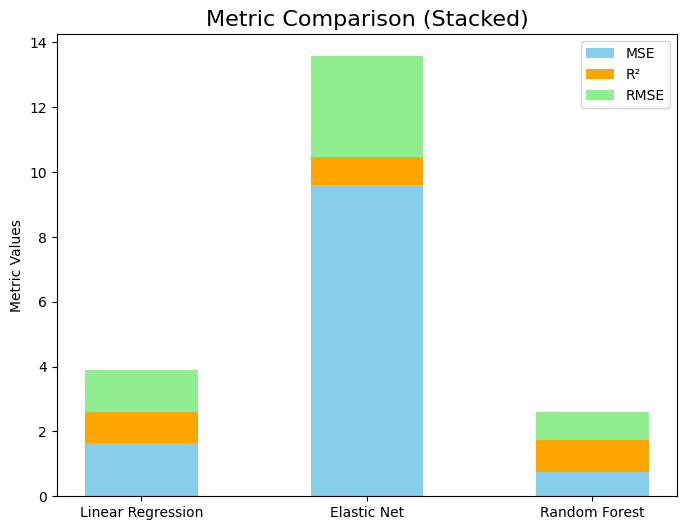

In [ ]:
# Data for bar chart
EC_models = ['Linear Regression', 'Elastic Net', 'Random Forest']
mse = [mse_lr, mse_en, mse_rf]
r2 = [r2_lr, r2_en, r2_rf]
rmse = [rmse_lr, rmse_en, rmse_rf]

# Plot stacked bar chart
x = np.arange(len(EC_models))
width = 0.5

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(x, mse, width, label='MSE', color='skyblue')
ax.bar(x, r2, width, bottom=mse, label='R²', color='orange')
ax.bar(x, rmse, width, bottom=np.array(mse) + np.array(r2), label='RMSE', color='lightgreen')

ax.set_ylabel('Metric Values')
ax.set_title('Metric Comparison (Stacked)', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(EC_models)
ax.legend()

plt.show()


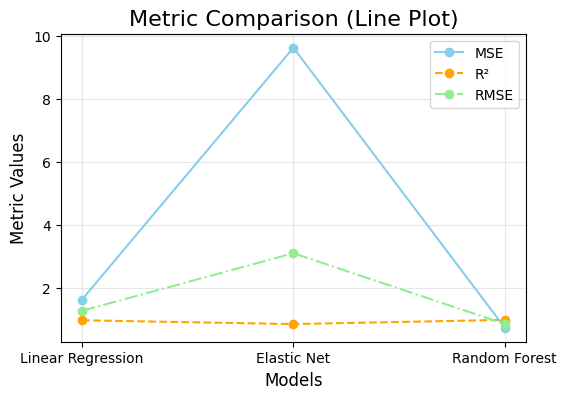

In [ ]:
# Line Plot
import matplotlib.pyplot as plt
import numpy as np

# Data for line plot
EC_models = ['Linear Regression', 'Elastic Net', 'Random Forest']
mse = [mse_lr, mse_en, mse_rf]
r2 = [r2_lr, r2_en, r2_rf]
rmse = [rmse_lr, rmse_en, rmse_rf]

# Create the line plot
fig, ax = plt.subplots(figsize=(6, 4))

# Plot each metric
ax.plot(EC_models, mse, marker='o', label='MSE', linestyle='-', color='skyblue')
ax.plot(EC_models, r2, marker='o', label='R²', linestyle='--', color='orange')
ax.plot(EC_models, rmse, marker='o', label='RMSE', linestyle='-.', color='lightgreen')

# Customize the plot
ax.set_title('Metric Comparison (Line Plot)', fontsize=16)
ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('Metric Values', fontsize=12)
ax.legend(fontsize=10)
ax.grid(alpha=0.3)
plt.show()


### MSE COmparison

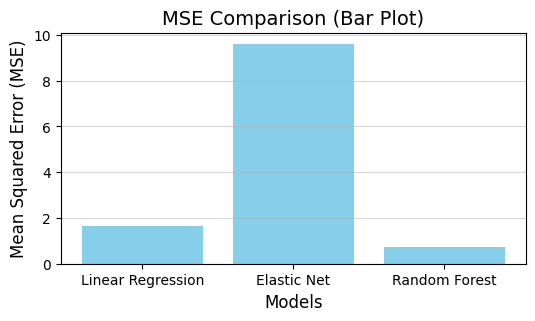

In [ ]:
import matplotlib.pyplot as plt

# Data for MSE
EC_models = ['Linear Regression', 'Elastic Net', 'Random Forest']
mse = [mse_lr, mse_en, mse_rf]

# Plot
plt.figure(figsize=(6, 3))
plt.bar(EC_models, mse, color='skyblue')
plt.title('MSE Comparison (Bar Plot)', fontsize=14)
plt.ylabel('Mean Squared Error (MSE)', fontsize=12)
plt.xlabel('Models', fontsize=12)
plt.grid(axis='y', alpha=0.5)
plt.show()




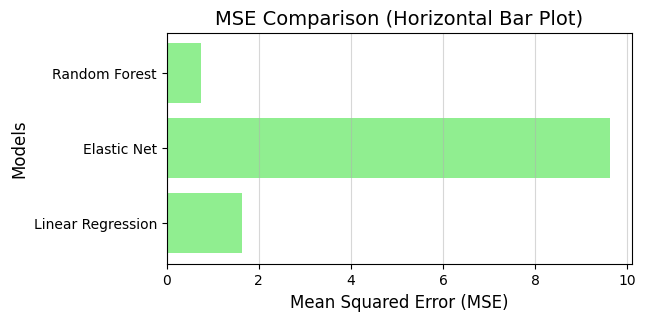

In [ ]:
#Horizontal Bar Plot
plt.figure(figsize=(6, 3))
plt.barh(EC_models, mse, color='lightgreen')
plt.title('MSE Comparison (Horizontal Bar Plot)', fontsize=14)
plt.xlabel('Mean Squared Error (MSE)', fontsize=12)
plt.ylabel('Models', fontsize=12)
plt.grid(axis='x', alpha=0.5)
plt.show()

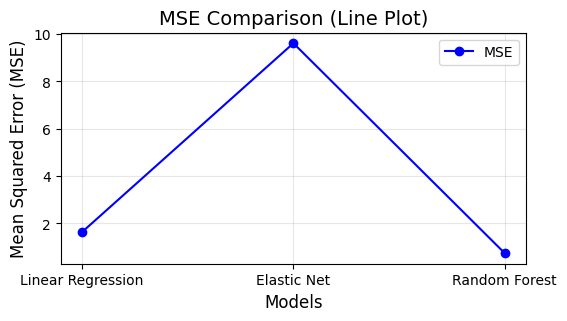

In [ ]:
plt.figure(figsize=(6, 3))
plt.plot(EC_models, mse, marker='o', linestyle='-', color='blue', label='MSE')
plt.title('MSE Comparison (Line Plot)', fontsize=14)
plt.ylabel('Mean Squared Error (MSE)', fontsize=12)
plt.xlabel('Models', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()


## R² Score (R-Squared) Comparison Plots

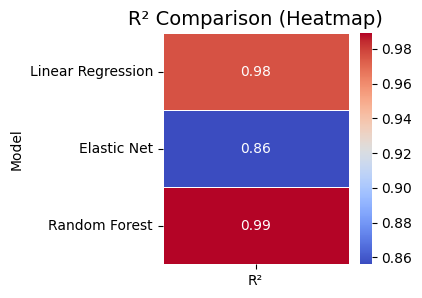

In [ ]:
# plt.figure(figsize=(6, 3))
# plt.scatter(EC_models, [r2_lr, r2_en, r2_rf], color='orange', s=100)
# plt.title('R² Comparison (Scatter Plot)', fontsize=14)
# plt.ylabel('R² Score', fontsize=12)
# plt.xlabel('Models', fontsize=12)
# plt.grid(alpha=0.5)
# plt.show()
import seaborn as sns
import pandas as pd

# DataFrame for R²
r2_data = pd.DataFrame({'Model': EC_models, 'R²': [r2_lr, r2_en, r2_rf]})
r2_data = r2_data.set_index('Model')

# Plot
plt.figure(figsize=(3, 3))
sns.heatmap(r2_data, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('R² Comparison (Heatmap)', fontsize=14)
plt.show()


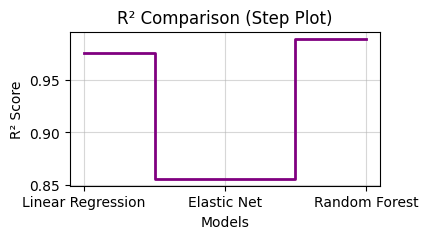

In [ ]:
plt.figure(figsize=(4, 2))
plt.step(EC_models, [r2_lr, r2_en, r2_rf], where='mid', color='purple', linewidth=2)
plt.title('R² Comparison (Step Plot)', fontsize=12)
plt.ylabel('R² Score', fontsize=10)
plt.xlabel('Models', fontsize=10)
plt.grid(alpha=0.5)
plt.show()


### Root Mean Squared Error (RMSE) Plots

<ipython-input-37-973eabdccce7>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




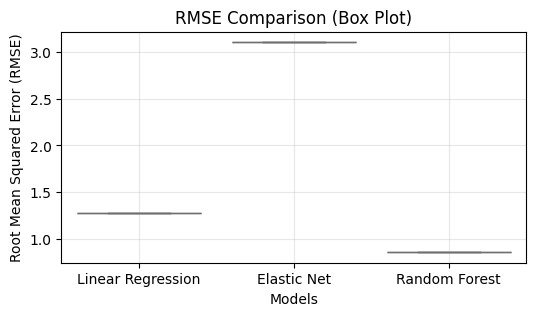

In [ ]:
# plt.figure(figsize=(6, 3))
# plt.pie([rmse_lr, rmse_en, rmse_rf], labels=EC_models, autopct='%1.1f%%', colors=['skyblue', 'orange', 'lightgreen'])
# plt.title('RMSE Comparison (Pie Chart)', fontsize=12)
# plt.show()

# DataFrame for Box Plot
rmse_data = pd.DataFrame({'Model': EC_models, 'RMSE': [rmse_lr, rmse_en, rmse_rf]})

plt.figure(figsize=(6, 3))
sns.boxplot(x='Model', y='RMSE', data=rmse_data, palette='pastel')
plt.title('RMSE Comparison (Box Plot)', fontsize=12)
plt.ylabel('Root Mean Squared Error (RMSE)', fontsize=10)
plt.xlabel('Models', fontsize=10)
plt.grid(alpha=0.3)
plt.show()

